In [1]:
# This cell courtesy of the starter code writer.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# My additional imports

import json
import datetime


In [3]:
# This cell courtesy of the starter code writer

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_identn = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_id = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
cities_count

605

In [4]:
print(cities)

['ous', 'rikitea', 'bredasdorp', 'bluff', 'busselton', 'hasaki', 'tabiauea', 'tuatapere', 'dikson', 'butaritari', 'pangody', 'cabo san lucas', 'kapaa', 'saleaula', 'jamestown', 'bima', 'cape town', 'talawdi', 'tuktoyaktuk', 'cidreira', 'kegayli', 'souillac', 'sept-iles', 'wuda', 'yerbogachen', 'punta arenas', 'olafsvik', 'sisimiut', 'hobart', 'arraial do cabo', 'new norfolk', 'bairiki', 'hilo', 'arona', 'roald', 'padang', 'dingle', 'castro', 'ausa', 'lavrentiya', 'mar del plata', 'huarmey', 'sayhat', 'vestmanna', 'khatanga', 'yellowknife', 'grindavik', 'bereznik', 'truth or consequences', 'chuy', 'samusu', 'broken hill', 'ushuaia', 'hithadhoo', 'illoqqortoormiut', 'albany', 'carnarvon', 'georgiyevka', 'shingu', 'bethel', 'berkakit', 'longyearbyen', 'roma', 'taolanaro', 'tiruvottiyur', 'marcona', 'vaini', 'vao', 'barrow', 'stepnyak', 'miranorte', 'east london', 'daguit', 'paamiut', 'cherskiy', 'touros', 'wanning', 'saskylakh', 'hima', 'mocambique', 'bilma', 'valleyview', 'bathsheba', 's

In [5]:

cities_df = pd.DataFrame(cities)
cities_df



,0
0,ous
1,rikitea
2,bredasdorp
3,bluff
4,busselton
...,...
600,kattivakkam
601,nakatsugawa
602,cape coast
603,khonuu


In [6]:
# Code courtesy of class example Ins_OpenWeatherRequest

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"


In [17]:
print("Beginning Data Retrieval")
print("-----------------------------")





for row in cities_df.index:
    city = cities_df.loc[row , 0]
    print(f"Processing Record {row+1} of {cities_count} | {city}")
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    weather_response = requests.get(query_url).json()
    
    try:
        latitude = weather_response["coord"]["lat"]
        longitude = weather_response["coord"]["lon"]
        temp = weather_response["main"]["temp"]
        humidity = weather_response["main"]["humidity"]
        clouds_percent = weather_response["clouds"]["all"]
        wind_speed = weather_response["wind"]["speed"]
        
        
        if row == 0:
            data_df = pd.DataFrame({"row":[row], "City" : [city], "Latitude":[latitude], "Longitude": [longitude], \
                                    "Temperature (degrees F)": [temp], \
                                    "Humidity": [humidity], "Clouds (%)": [clouds_percent], "Winds Speed": [wind_speed]})
        
            date = weather_response['dt']
            
        else:
            new_row = {"row":row, "City" : city, "Latitude":latitude, "Longitude": longitude, \
                       "Temperature (degrees F)": temp, \
                        "Humidity": humidity, "Clouds (%)": clouds_percent, "Winds Speed": wind_speed}
            data_df = data_df.append(new_row, ignore_index=True)
            
        
    except KeyError:
        print("City not found. Skipping")
        
    
    

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 605 | ous
Processing Record 2 of 605 | rikitea
Processing Record 3 of 605 | bredasdorp
Processing Record 4 of 605 | bluff
Processing Record 5 of 605 | busselton
Processing Record 6 of 605 | hasaki
Processing Record 7 of 605 | tabiauea
City not found. Skipping
Processing Record 8 of 605 | tuatapere
Processing Record 9 of 605 | dikson
Processing Record 10 of 605 | butaritari
Processing Record 11 of 605 | pangody
Processing Record 12 of 605 | cabo san lucas
Processing Record 13 of 605 | kapaa
Processing Record 14 of 605 | saleaula
City not found. Skipping
Processing Record 15 of 605 | jamestown
Processing Record 16 of 605 | bima
Processing Record 17 of 605 | cape town
Processing Record 18 of 605 | talawdi
City not found. Skipping
Processing Record 19 of 605 | tuktoyaktuk
Processing Record 20 of 605 | cidreira
Processing Record 21 of 605 | kegayli
City not found. Skipping
Processing Record 22 of 605 | souillac
Pr

Processing Record 188 of 605 | deputatskiy
Processing Record 189 of 605 | bitung
Processing Record 190 of 605 | sao felix do xingu
Processing Record 191 of 605 | port alfred
Processing Record 192 of 605 | savyntsi
Processing Record 193 of 605 | port hardy
Processing Record 194 of 605 | placido de castro
Processing Record 195 of 605 | komsomolskiy
Processing Record 196 of 605 | beyneu
Processing Record 197 of 605 | launceston
Processing Record 198 of 605 | faanui
Processing Record 199 of 605 | cumpas
Processing Record 200 of 605 | saint-joseph
Processing Record 201 of 605 | bouna
Processing Record 202 of 605 | kruisfontein
Processing Record 203 of 605 | flinders
Processing Record 204 of 605 | luganville
Processing Record 205 of 605 | pisco
Processing Record 206 of 605 | alenquer
Processing Record 207 of 605 | geraldton
Processing Record 208 of 605 | kavaratti
Processing Record 209 of 605 | missoula
Processing Record 210 of 605 | ambunti
Processing Record 211 of 605 | clyde river
Process

Processing Record 385 of 605 | kentau
Processing Record 386 of 605 | redmond
Processing Record 387 of 605 | pelym
Processing Record 388 of 605 | koboldo
City not found. Skipping
Processing Record 389 of 605 | ixtapa
Processing Record 390 of 605 | raghunathpur
Processing Record 391 of 605 | sosnovskoye
Processing Record 392 of 605 | praia da vitoria
Processing Record 393 of 605 | dukat
Processing Record 394 of 605 | kieta
Processing Record 395 of 605 | madras
Processing Record 396 of 605 | mount gambier
Processing Record 397 of 605 | nemuro
Processing Record 398 of 605 | chimbote
Processing Record 399 of 605 | tazovskiy
Processing Record 400 of 605 | huangchuan
Processing Record 401 of 605 | outjo
Processing Record 402 of 605 | jiayuguan
Processing Record 403 of 605 | rovaniemi
Processing Record 404 of 605 | tupik
Processing Record 405 of 605 | verkh-usugli
Processing Record 406 of 605 | okha
Processing Record 407 of 605 | denia
Processing Record 408 of 605 | izumo
Processing Record 409

City not found. Skipping
Processing Record 585 of 605 | kalmunai
Processing Record 586 of 605 | santa elena
Processing Record 587 of 605 | kasongo-lunda
Processing Record 588 of 605 | nuevo ideal
Processing Record 589 of 605 | morant bay
Processing Record 590 of 605 | kuusamo
Processing Record 591 of 605 | lata
Processing Record 592 of 605 | shiraz
Processing Record 593 of 605 | cayenne
Processing Record 594 of 605 | kirn
Processing Record 595 of 605 | palauig
Processing Record 596 of 605 | durban
Processing Record 597 of 605 | yanam
Processing Record 598 of 605 | kargopol
Processing Record 599 of 605 | berbera
Processing Record 600 of 605 | aksarka
Processing Record 601 of 605 | kattivakkam
Processing Record 602 of 605 | nakatsugawa
Processing Record 603 of 605 | cape coast
Processing Record 604 of 605 | khonuu
City not found. Skipping
Processing Record 605 of 605 | itarema
-----------------------------
Data Retrieval Complete
-----------------------------


In [18]:


# Converting date to readable string.

date = datetime.date.fromtimestamp(date)

print(date)

2020-08-05


In [19]:
# Saving the data to .csv format

data_df.to_csv("./output_files/city_data.csv")

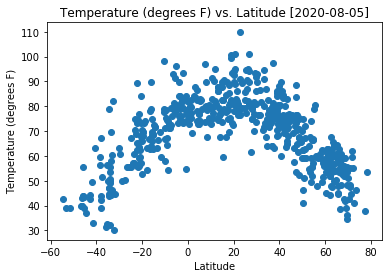

In [20]:
# Generating Temp. vs Latitude

plt.scatter(data_df["Latitude"], data_df["Temperature (degrees F)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (degrees F)")
plt.title(f"Temperature (degrees F) vs. Latitude [{date}]")


plt.savefig("./output_files/lat_temp.png")

Shows Temperature vs Latitude for randomly selected cities. The peak to the right of zero agrees with the fact that it is summer in the northern hemisphere and winter in the southern hemisphere today

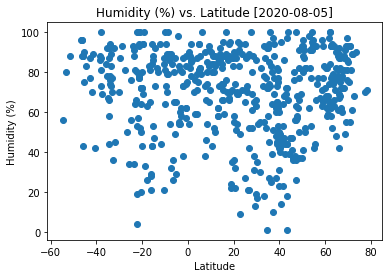

In [21]:
# Generating Humidity vs Latitude

plt.scatter(data_df["Latitude"], data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity (%) vs. Latitude [{date}]")
plt.savefig("./output_files/lat_hum.png")

Humidities reach lower values in the Northern hemisphere, due to summer. Everything at the equator (Latitude 0) is very humid.

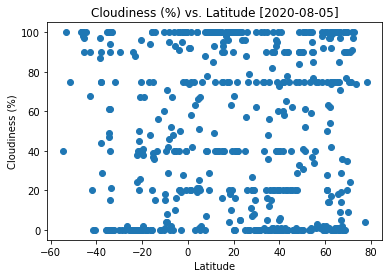

In [22]:
# Generating Cloudiness vs Latitude

plt.scatter(data_df["Latitude"], data_df["Clouds (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness (%) vs. Latitude [{date}]")
plt.savefig("./output_files/lat_cloud.png")

Some apparent clustering at zero cloudiness and 100% cloudiness. Maybe more 100% cloudy cities in the north.

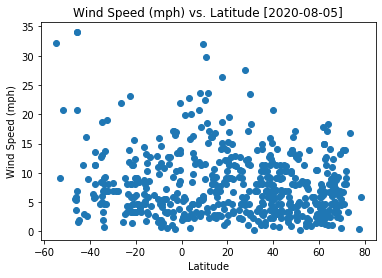

In [23]:
# Generating Wind Speed vs Latitude

plt.scatter(data_df["Latitude"], data_df["Winds Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed (mph) vs. Latitude [{date}]")
plt.savefig("./output_files/lat_wind.png")

Wind speed seems to have little correlation with latitude.

In [24]:
# Creating separate dataframes for northern and southern hemisphere

north = data_df.loc[data_df["Latitude"] > 0]

south = data_df.loc[data_df["Latitude"] < 0]

# Converting Southern Hemisphere latitudes to absolute values (degrees from equator)

south['Latitude'] = south['Latitude'].abs()

south['Latitude'].head()

c:\users\potas\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


1    23.12
2    34.53
3    46.60
4    33.65
6    46.13
Name: Latitude, dtype: float64

In [25]:
def linreg(hemisphere, hemi_string, coordinate):
    plt.scatter(hemisphere["Latitude"], hemisphere[coordinate])
    plt.xlabel("Degrees from Equator")
    plt.ylabel(coordinate)
    plt.title(f"{coordinate} vs. Latitude [{date}] for {hemi_string} hemisphere")
    #plt.savefig(f"./output_files/{coordinate[0:3]}_{hemi_string}.png")
    
    # Pulling this largely from my own work at 
    # https://github.com/cullen-andrews/matplotlib-challenge/blob/master/matplotlib.ipynb
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemisphere["Latitude"], hemisphere[coordinate])

    regress_values = hemisphere["Latitude"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(hemisphere["Latitude"], hemisphere[coordinate])
    plt.plot(hemisphere["Latitude"],regress_values,"b-")
    #plt.annotate(line_eq,fontsize=15,color="blue")
    
    plt.savefig(f"./output_files/{coordinate[0:3]}_{hemi_string}.png")
    
    print(f"Equation of Linear Regression:  {line_eq}")
    print(f"Correlation Coefficent: r = {rvalue}")

Equation of Linear Regression:  y = -0.5x + 90.46
Correlation Coefficent: r = -0.7573879256816288


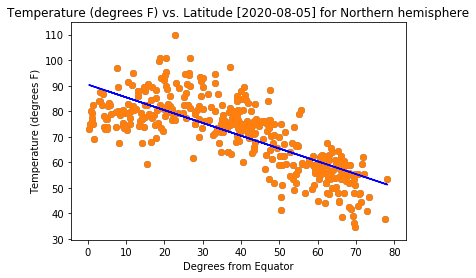

In [26]:
linreg(north, "Northern", "Temperature (degrees F)")

Equation of Linear Regression:  y = -0.86x + 82.28
Correlation Coefficent: r = -0.791378693163626


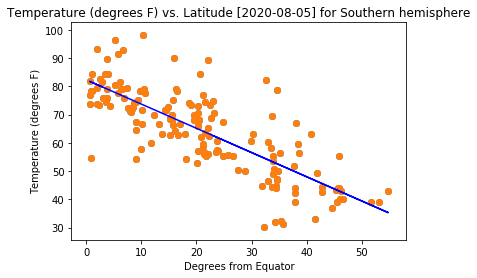

In [27]:
linreg(south, "Southern", "Temperature (degrees F)")

Decent linear correlations between temperature and degrees from the equator for both hemispheres. r-values getting somewhat close to -1. Nice trend towards lower temperature further from the equator.

Equation of Linear Regression:  y = 0.03x + 67.84
Correlation Coefficent: r = 0.03052997929484352


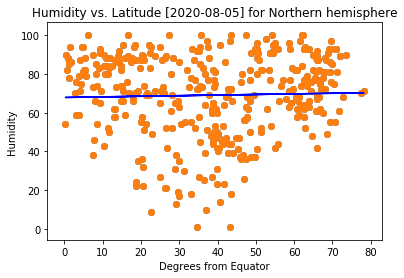

In [28]:
linreg(north, "Northern", "Humidity")

Equation of Linear Regression:  y = 0.28x + 65.43
Correlation Coefficent: r = 0.1838114866603825


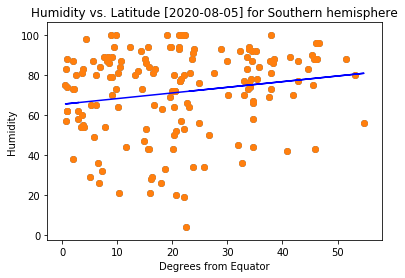

In [29]:
linreg(south, "Southern", "Humidity")

No linear correlation between humidity and distance from the equator for either hemisphere. r-values close to zero.

Equation of Linear Regression:  y = -0.16x + 55.68
Correlation Coefficent: r = -0.0829334887436276


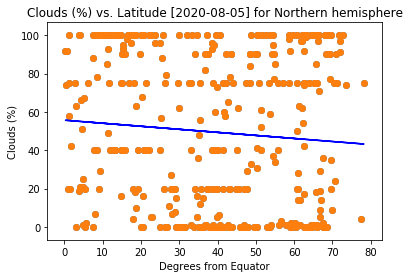

In [30]:
linreg(north, "Northern", "Clouds (%)")

Equation of Linear Regression:  y = 0.4x + 36.12
Correlation Coefficent: r = 0.1419892149450887


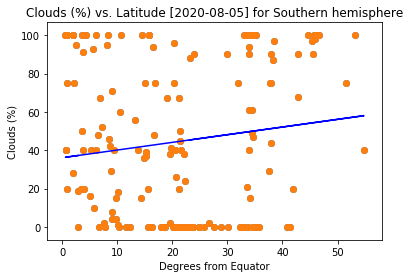

In [31]:
linreg(south, "Southern", "Clouds (%)")

No linear relationship between cloudiness and distance from the equator for either hemisphere.

Equation of Linear Regression:  y = -0.05x + 9.83
Correlation Coefficent: r = -0.20066911120844727


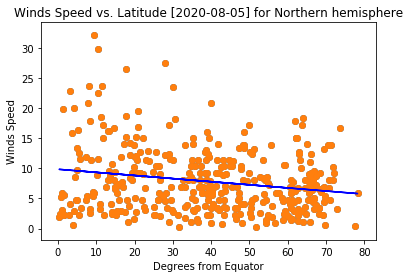

In [32]:
linreg(north, "Northern", "Winds Speed")

Equation of Linear Regression:  y = 0.07x + 6.62
Correlation Coefficent: r = 0.1713981785719152


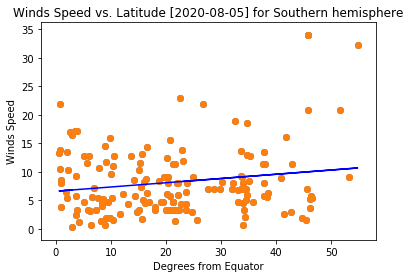

In [33]:
linreg(south, "Southern", "Winds Speed")

No linear relationship between wind speed and distance from the equator.